# Esperanza's Development Notebook - NEW Version

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import prophet as Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
# test import - not required for this version of data
#import brickschema

In [ ]:
# Prophet import gives: "Importing plotly failed. Interactive plots will not work."
# We're not using interactive plots so it should be fine but I'm not sure

## Grabbing Data from Data/Out

In [4]:
# this path is based on my workflow with virtual environment - path will need to be changed

# floor_data = pd.read_csv('Capstone-Brick-Modeling/data/temp/combined_floors.csv')

In [5]:
#col_list = ['time', 'Common Setpoint', 'Actual Sup Flow SP', 'Zone Temperature', 'Actual Supply Flow', 'Outside Air Temp', 'Humidity', 'energy']

floor_2 = pd.read_csv('merged_all_2F.csv', index_col = 'Unnamed: 0')
floor_3 = pd.read_csv('merged_all_3F.csv', index_col = 'Unnamed: 0')
floor_4 = pd.read_csv('merged_all_4F.csv', index_col = 'Unnamed: 0')

In [6]:
# one version of this is Unnamed: 0.2 but I'm not sure why this one says 

floor_2 = floor_2.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1'], axis = 1)

In [7]:
floor_2.head(5)

,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,2018-01-03T20:57:39+00:00,72.5,330.0,75.2,318.73,10.109642,68.44,56.0,75.2,317.06,68.50,56.0,10.113301
1,2018-01-03T21:04:13+00:00,72.5,330.0,75.2,317.06,10.113301,68.50,56.0,75.7,314.34,68.25,56.0,10.099466
2,2018-01-03T21:10:44+00:00,72.5,330.0,75.7,314.34,10.099466,68.25,56.0,75.7,313.91,68.31,56.0,10.241028
3,2018-01-03T21:17:16+00:00,72.5,330.0,75.7,313.91,10.241028,68.31,56.0,75.7,318.31,68.44,57.0,10.187620
4,2018-01-03T21:23:44+00:00,72.5,330.0,75.7,318.31,10.187620,68.44,57.0,75.7,316.65,68.81,57.0,10.194055


In [8]:
floor_3 = floor_3.drop(['Unnamed: 0.1'], axis = 1)

In [9]:
floor_3.head(5)

,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,2018-07-05T00:58:48+00:00,72.0,295.0,73.75,287.56,9.067059,68.88,53.0,73.75,289.97,69.31,53.0,9.104582
1,2018-07-05T01:04:13+00:00,72.0,295.0,73.75,289.97,9.104582,69.31,53.0,73.75,291.17,68.88,53.0,9.377247
2,2018-07-05T01:09:37+00:00,72.0,295.0,73.75,291.17,9.377247,68.88,53.0,73.75,299.89,68.94,53.0,9.147068
3,2018-07-05T01:15:17+00:00,72.0,295.0,73.75,299.89,9.147068,68.94,53.0,73.75,294.97,69.13,53.0,9.198235
4,2018-07-05T01:20:55+00:00,72.0,295.0,73.75,294.97,9.198235,69.13,53.0,73.75,296.62,68.94,53.0,9.212810


In [10]:
floor_4 = floor_4.drop(['Unnamed: 0.1'], axis = 1)

In [11]:
floor_4.head(5)

,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,2018-09-23T22:59:39+00:00,72.0,722.73,75.25,733.46,23.554224,71.31,53.0,74.74,692.03,71.19,53.0,22.261861
1,2018-09-23T23:06:38+00:00,72.0,661.39,74.74,692.03,22.261861,71.19,53.0,74.74,654.06,71.19,53.0,19.471076
2,2018-09-23T23:13:38+00:00,72.0,624.95,74.74,654.06,19.471076,71.19,53.0,74.24,576.94,70.94,53.0,18.861571
3,2018-09-23T23:20:38+00:00,72.0,562.05,74.24,576.94,18.861571,70.94,53.0,74.24,558.88,70.94,53.0,17.087055
4,2018-09-23T23:27:37+00:00,72.0,532.93,74.24,558.88,17.087055,70.94,53.0,74.24,506.30,70.81,53.0,16.212959


In [12]:
floor_2['floor'] = 2
floor_3['floor'] = 3
floor_4['floor'] = 4

In [13]:
# ignoring Will's zone number code

combined_floors = pd.concat([floor_2, floor_3, floor_4]).reset_index(drop = True)


In [14]:
combined_floors.head(5)

,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next,floor
0,2018-01-03T20:57:39+00:00,72.5,330.0,75.2,318.73,10.109642,68.44,56.0,75.2,317.06,68.50,56.0,10.113301,2
1,2018-01-03T21:04:13+00:00,72.5,330.0,75.2,317.06,10.113301,68.50,56.0,75.7,314.34,68.25,56.0,10.099466,2
2,2018-01-03T21:10:44+00:00,72.5,330.0,75.7,314.34,10.099466,68.25,56.0,75.7,313.91,68.31,56.0,10.241028,2
3,2018-01-03T21:17:16+00:00,72.5,330.0,75.7,313.91,10.241028,68.31,56.0,75.7,318.31,68.44,57.0,10.187620,2
4,2018-01-03T21:23:44+00:00,72.5,330.0,75.7,318.31,10.187620,68.44,57.0,75.7,316.65,68.81,57.0,10.194055,2


In [15]:
combined_floors['time_transformed'] = combined_floors['time'].apply(lambda x: pd.Timestamp(x))

## Getting Relevant Dates for Train / Test Data

In [16]:
dates = combined_floors['time_transformed'].transform(lambda x: x.date)

In [17]:
dates_test = (dates >= pd.Timestamp('2018-08-01'))

In [18]:
onwards_test_date = combined_floors.loc[dates_test, :]
pre_test_date = combined_floors.loc[~dates_test, :]

In [19]:
pre_test_date.shape

(437044, 15)

In [20]:
onwards_test_date.shape

(188633, 15)

In [21]:
# amount of data in test set: 30%
188633 / (188633 + 437044)

0.3014862301155388

## Work with Prophet

#### For missing analysis work, please look at old version of this notebook.

In [22]:
# choosing the relevant info
pre_test_date_reduced = pre_test_date.loc[:, ['time', 'energy']].reset_index(drop = True)
onwards_test_date_reduced = onwards_test_date.loc[:, ['time', 'energy']].reset_index(drop = True)

In [23]:
# stripping time zones since they're incompatible with Prophet
pre_test_date_reduced['time'] = pre_test_date_reduced['time'].transform(lambda x: x[0:-6])
onwards_test_date_reduced['time'] = onwards_test_date_reduced['time'].transform(lambda x: x[0:-6])

In [27]:
pre_test_date_reduced = pre_test_date_reduced.rename({'time': 'ds', 'energy': 'y'}, axis = 1)
onwards_test_date_reduced = onwards_test_date_reduced.rename({'time': 'ds', 'energy': 'y'}, axis = 1)


### Determining cap for Prophet model

In [37]:
pre_test_date_reduced['y'].sort_values(ascending = False)

145445    49.165584
76149     48.547559
145444    46.165827
321162    44.646128
76148     44.415555
            ...    
313991     0.000000
313992     0.000000
313993     0.000000
313995     0.000000
118362     0.000000
Name: y, Length: 437044, dtype: float64

In [38]:
pre_test_date_reduced['y'].mean()

9.600232685687184

In [39]:
pre_test_date_reduced['y'].median()

9.078714640036456

In [41]:
pre_test_date_reduced['cap'] = 50
# have not set a changing cap with HVAC because I'm not sure it did change over this time frame

### Training Model

In [42]:
prophet_model = Prophet.Prophet()

In [43]:
prophet_model.fit(pre_test_date_reduced)
# got disabling yearly seasonality text - I think this makes sense to disable because our data < year

2023-02-01:14:33:06,230 INFO    [forecaster.py:931] Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-02-01:14:33:06,751 DEBUG   [filesystem.py:123] input tempfile: /var/folders/g5/xsqtnsrs6h51yd3pxn9xyz480000gp/T/tmpf6rtg3fd/su_59mb9.json
2023-02-01:14:33:15,424 DEBUG   [filesystem.py:123] input tempfile: /var/folders/g5/xsqtnsrs6h51yd3pxn9xyz480000gp/T/tmpf6rtg3fd/g235bbi6.json
2023-02-01:14:33:15,425 DEBUG   [model.py:1677] idx 0
2023-02-01:14:33:15,426 DEBUG   [model.py:1678] running CmdStan, num_threads: None
2023-02-01:14:33:15,426 DEBUG   [model.py:1690] CmdStan args: ['/Users/esr/Library/Python/3.8/lib/python/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34672', 'data', 'file=/var/folders/g5/xsqtnsrs6h51yd3pxn9xyz480000gp/T/tmpf6rtg3fd/su_59mb9.json', 'init=/var/folders/g5/xsqtnsrs6h51yd3pxn9xyz480000gp/T/tmpf6rtg3fd/g235bbi6.json', 'output', 'file=/var/folders/g5/xsqtnsrs6h51yd3pxn9xyz480000gp/T/tmpf6rtg3fd/pro

### Making Model Forecast

#### We want to predict every 5 minutes from August 2, 2018 through the end of the data on January 7?, 2019
This involves 5 minutes ... still figuring this out

In [59]:
prophet_forecast = prophet_model.make_future_dataframe(periods = 51000, freq = '5min')
prophet_forecast = prophet_model.predict(prophet_forecast)


In [60]:
prophet_forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
107475,2019-01-08 23:17:40,20.980550,-174.052685,216.514283,-178.775344,212.660200,4.356247,4.356247,4.356247,3.606161,3.606161,3.606161,0.750086,0.750086,0.750086,0.0,0.0,0.0,25.336797
107476,2019-01-08 23:22:40,20.980764,-178.840199,218.098146,-178.780449,212.669352,4.283452,4.283452,4.283452,3.533172,3.533172,3.533172,0.750280,0.750280,0.750280,0.0,0.0,0.0,25.264215
107477,2019-01-08 23:27:40,20.980977,-177.376771,218.905645,-178.785554,212.678504,4.212310,4.212310,4.212310,3.461816,3.461816,3.461816,0.750494,0.750494,0.750494,0.0,0.0,0.0,25.193286
107478,2019-01-08 23:32:40,20.981190,-176.001823,218.073245,-178.790658,212.687657,4.142886,4.142886,4.142886,3.392158,3.392158,3.392158,0.750728,0.750728,0.750728,0.0,0.0,0.0,25.124076
107479,2019-01-08 23:37:40,20.981403,-178.237524,216.665593,-178.795763,212.696809,4.075226,4.075226,4.075226,3.324244,3.324244,3.324244,0.750982,0.750982,0.750982,0.0,0.0,0.0,25.056629


In [ ]:
# This got us a little past the time I wanted to be at but it works

## Plot Analysis

#### Initial result shows that y hat values grow too quickly

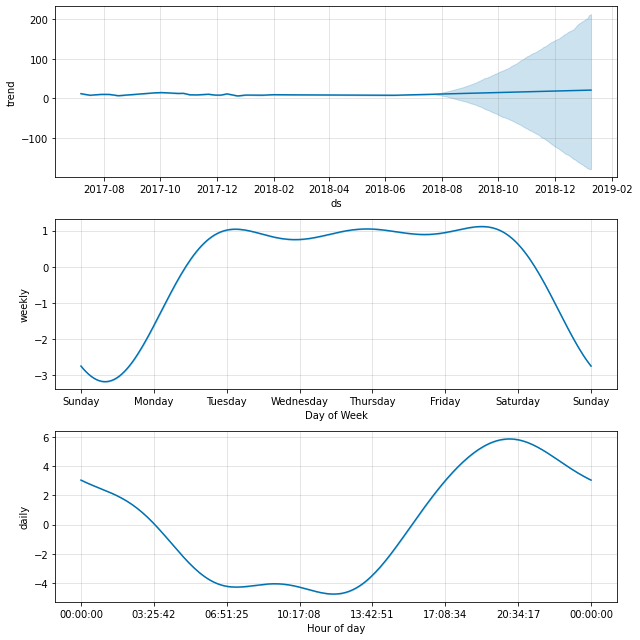

In [61]:
fig2 = prophet_model.plot_components(prophet_forecast)

In [ ]:
# Ok it seems to follow what we expect for the weekends but may not follow what we're expecting for the other two


In [62]:
prophet_forecast_reduced = prophet_forecast.loc[:, ['ds', 'yhat']]

In [63]:
prophet_forecast_reduced['timestamp_changed'] = prophet_forecast_reduced['ds'].transform(lambda x: pd.Timestamp(x))

In [65]:
#onwards_compare = onwards_test_date.loc[:, ['time', 'energy']]
#onwards_compare['time'] = onwards_compare['time'].transform(lambda x: x[0:-6])
#onwards_compare = onwards_compare.rename({'time': 'ds', 'energy': 'yhat'}, axis = 1)
onwards_test_date_reduced['timestamp_changed'] = onwards_test_date_reduced['ds'].transform(lambda x: pd.Timestamp(x))

In [66]:
onwards_test_date_reduced.head(5)

,ds,y,timestamp_changed
0,2018-09-03T01:02:18,9.038064,2018-09-03 01:02:18
1,2018-09-03T01:09:23,9.020124,2018-09-03 01:09:23
2,2018-09-03T01:16:28,8.966305,2018-09-03 01:16:28
3,2018-09-03T01:23:32,9.121355,2018-09-03 01:23:32
4,2018-09-03T01:30:36,8.978479,2018-09-03 01:30:36


In [68]:
merge_test = prophet_forecast_reduced.merge(onwards_test_date_reduced, left_on = 'timestamp_changed', right_on = 'timestamp_changed')

In [69]:
merge_test

,ds_x,yhat,timestamp_changed,ds_y,y
0,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,9.840562
1,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,30.443329
2,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,14.192031
3,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,9.711402
4,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,2.587140
...,...,...,...,...,...
666,2019-01-03 13:52:40,18.339066,2019-01-03 13:52:40,2019-01-03T13:52:40,0.000000
667,2019-01-03 13:52:40,18.339066,2019-01-03 13:52:40,2019-01-03T13:52:40,1.082106
668,2019-01-03 13:52:40,18.339066,2019-01-03 13:52:40,2019-01-03T13:52:40,1.110293
669,2019-01-03 13:52:40,18.339066,2019-01-03 13:52:40,2019-01-03T13:52:40,10.899280


In [71]:
merge_test['yhat'].nunique() # there's only 77 unique valhyes

77

In [ ]:
# I'm very confused why there's duplicates here??? Need to clear these up and see which y values are causing this